In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Binary handwritten digit classification

Load and check the data:

In [9]:
X, y = load_data()
print(X.shape, y.shape)

(1000, 400) (1000, 1)


Visualize it. It's a lot, so randomly select 64 rows.

Then, for each row, re-map it to its 20x20 grayscale image and draw each.

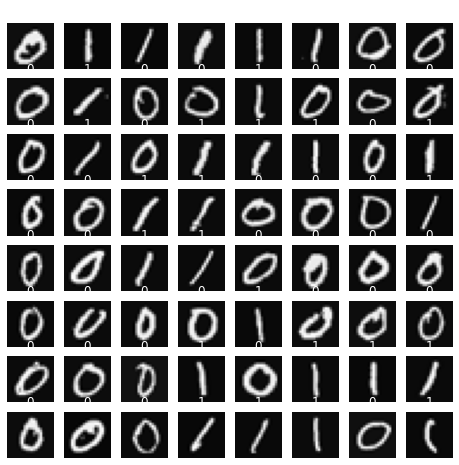

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_rand_reshape = X[random_index].reshape((20, 20)).T
    ax.imshow(X_rand_reshape, cmap='gray')
    
    ax.set_title(y[random_index, 0], c='w')
    ax.set_axis_off()

We're using a neural network with 2 hidden layers of 25 and 15 units.

The activation function in all cases is sigmoid.

Input is 20x20 = 400, and output is 1

=>

W1 = 400 x 25

W2 = 25  x 15

In [15]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25, activation='sigmoid'),
        Dense(15, activation='sigmoid'),
        Dense(1, activation='sigmoid')
    ], name='my_model'
)
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                10025     
_________________________________________________________________
dense_4 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Shapes of params and layers:
print([layer.get_weights() for layer in model.layers])

[[array([[-0.11014121,  0.00163038, -0.05594566, ...,  0.03343739,
        -0.1057789 , -0.07900736],
       [-0.06799611, -0.03343116, -0.06770186, ...,  0.11092903,
        -0.0418044 ,  0.08554496],
       [ 0.02184643,  0.04938851,  0.04965381, ..., -0.02345366,
        -0.10071334,  0.0847342 ],
       ...,
       [ 0.01455587,  0.08868381,  0.08216918, ..., -0.08439612,
        -0.0881426 ,  0.10204352],
       [-0.05655378,  0.06196906, -0.08772872, ..., -0.0202391 ,
        -0.08847371,  0.10137631],
       [ 0.01549402, -0.06899403,  0.06351255, ..., -0.06771152,
         0.07325365,  0.06779344]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)], [array([[-1.90689802e-01, -3.70249689e-01,  1.78141654e-01,
         1.19071782e-01, -3.13092500e-01, -2.32229099e-01,
        -6.78200424e-02,  1.66295350e-01, -3.31572801e-01,
         1.01190388e-01, -3.02705646e-01, -1.20560914e-01,


Compile to define the loss function and run gradient descent:

In [21]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(1e-3),
)

model.fit(
    X, y,
    epochs = 20
)

2022-07-04 13:57:05.833178: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-04 13:57:05.856201: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3692995000 Hz


Epoch 1/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6403
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4536
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3058
Epoch 4/20
32/32 [==============================] - 0s 932us/step - loss: 0.2053
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1517
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1075
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0888
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0702
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0657
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0506
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0499
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0379
Epoch 13/20
32/32 [============================

Run the model to make a prediction (probability of being a '1'):

In [29]:
prediction = model.predict(X[0].reshape(1, 400)) >= 0.5
print(f"Predicting a zero: {prediction.astype(int)}")
prediction = model.predict(X[500].reshape(1, 400)) >= 0.5
print(f"Predicting a one:  {prediction.astype(int)}")

Predicting a zero: [[0]]
Predicting a one:  [[1]]


Check it against the whole training set and visualize:

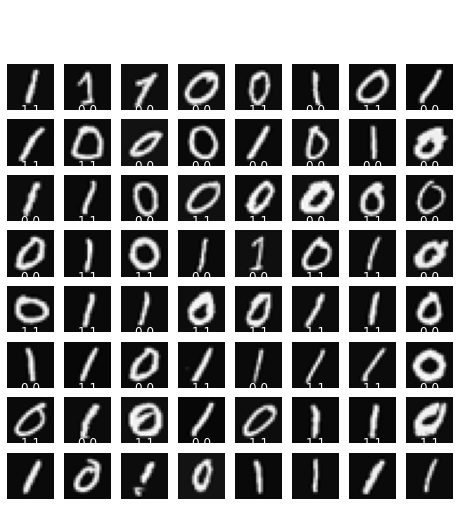

In [35]:
m, n = X.shape
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_rand_reshape = X[random_index].reshape((20, 20)).T
    ax.imshow(X_rand_reshape, cmap='gray')
    p = model.predict(X[random_index].reshape(1, 400)) >= 0.5
    ax.set_title(f"{y[random_index, 0]} {int(p.astype(int))}", c='w')
    fig.suptitle("true, pred", c='w')
    ax.set_axis_off()

Easy.

Own implementation, vectorized to follow:

In [47]:
def dense(a_in, W, b, g=sigmoid):
    return g(np.matmul(a_in, W) + b)


In [48]:
def sequential(x, W1, b1, W2, b2, W3, b3):
    return dense(
        dense(
            dense(x, W1, b1, sigmoid), W2, b2
        ), W3, b3
    )    

In [53]:
W1, b1 = model.layers[0].get_weights()
W2, b2 = model.layers[1].get_weights()
W3, b3 = model.layers[2].get_weights()

prediction_zero = sequential(X[0], W1, b1, W2, b2, W3, b3) >= 0.5
prediction_one = sequential(X[500], W1, b1, W2, b2, W3, b3) >= 0.5
print(f"{prediction_zero}, {prediction_one}")

[False], [ True]


Can visualize the above with more code (repurposed from further above), if wanted, but the gist is clear.